In [219]:
import os

import gc
import re
import operator 

import numpy as np
import pandas as pd
import cv2

from sklearn import model_selection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.preprocessing import image as Im

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dense, Activation, Lambda, Reshape, Flatten
from keras.models import Model, load_model

from keras import backend as K
import argparse

from sklearn.model_selection import train_test_split, cross_val_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv2D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, Masking
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,  Callback, EarlyStopping, ReduceLROnPlateau



# Reading and Pre processing of data from curiosity


In [15]:
data=pd.read_csv('curiosity_data.csv')

In [16]:
data.head()

,sPDL Tool v2.0 (Last edited 25 July 2015),Testset Quartiles,SiO2,,.1,.2,TiO2,.3,.4,.5,...,.19,.20,K2O,.21,.22,.23,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,COMBINED PLS+ICA RESULTS,Min,0.11,,,,0,,,,...,,,0,,,,NaN,NaN,NaN,NaN
1,NaN,1st,48.3242,,,,0.41,,,,...,,,0.460583,,,,NaN,NaN,NaN,NaN
2,NaN,Med,56,,,,0.71,,,,...,,,1.87146,,,,NaN,NaN,NaN,NaN
3,NaN,3rd,63.4744,,,,1.08,,,,...,,,3.6,,,,NaN,NaN,NaN,NaN
4,NaN,Max,84.9,,,,3.575,,,,...,,,8.88,,,,NaN,NaN,NaN,NaN


In [17]:
data=data.fillna(0)

In [18]:
data.head()

,sPDL Tool v2.0 (Last edited 25 July 2015),Testset Quartiles,SiO2,,.1,.2,TiO2,.3,.4,.5,...,.19,.20,K2O,.21,.22,.23,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,COMBINED PLS+ICA RESULTS,Min,0.11,,,,0,,,,...,,,0,,,,0,0,0,0
1,0,1st,48.3242,,,,0.41,,,,...,,,0.460583,,,,0,0,0,0
2,0,Med,56,,,,0.71,,,,...,,,1.87146,,,,0,0,0,0
3,0,3rd,63.4744,,,,1.08,,,,...,,,3.6,,,,0,0,0,0
4,0,Max,84.9,,,,3.575,,,,...,,,8.88,,,,0,0,0,0


In [19]:
data_need=data[['SiO2','TiO2','Al2O3','FeOT','MgO','CaO','Na2O','K2O']]

In [23]:
data_need.head(5)
cols=['SiO2','TiO2','Al2O3','FeOT','MgO','CaO','Na2O','K2O']

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=True, with_std=True)

In [48]:
x = data_need['TiO2'].values #returns a numpy array



In [52]:
def clear_data(ls):
    new_list=[]
    for item in ls:
        if item in cols:
            pass
        else:
            new_list.append(float(item))
    return new_list        

In [53]:
sio2=clear_data(x)

In [57]:
dict={}
for col in cols:
    x=data_need[col].values
    x_clear=clear_data(x)
    dict[col]=x_clear

In [60]:
clean_dataframe=pd.DataFrame(dict)

In [61]:
clean_dataframe.head(5)

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
0,0.1100,0.000,0.0200,0.017996,0.01000,0.010,0.00000,0.000000
1,48.3242,0.410,12.1100,3.939750,1.68000,0.420,0.53000,0.460583
2,56.0000,0.710,15.5700,6.091700,2.91000,1.880,1.99000,1.871460
3,63.4744,1.080,17.7700,9.560110,4.95848,8.922,3.40000,3.600000
4,84.9000,3.575,32.1395,49.057600,45.92580,35.670,6.77789,8.880000


# Normalizing the data

In [64]:
transformed=sc.fit_transform(clean_dataframe.values)

In [67]:
transformed.shape

(339, 8)

In [70]:
new_dataframe=pd.DataFrame(transformed,columns=cols)

In [212]:
new_dataframe.head(5)

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Label,K,Rare_earth,P
0,0.000000,0.000000,0.000000,0.000367,0.000000,0.000000,0.000000,0.000000,1,0,0,0
1,0.568631,0.040755,0.376407,0.080309,0.036371,0.011497,0.068299,0.051867,1,0,0,0
2,0.659158,0.070577,0.484130,0.124174,0.063159,0.052440,0.256443,0.210750,1,0,0,0
3,0.747310,0.107356,0.552624,0.194875,0.107773,0.249916,0.438144,0.405405,1,0,0,0
4,1.000000,0.355368,1.000000,1.000000,1.000000,1.000000,0.873439,1.000000,1,0,0,0


In [73]:
# Labelling the dataframe as 1 as dataset from lisp
new_dataframe['Label']=None

In [74]:
new_dataframe['Label']=1

In [75]:
new_dataframe.head(5)

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Label
0,0.000000,0.000000,0.000000,0.000367,0.000000,0.000000,0.000000,0.000000,1
1,0.568631,0.040755,0.376407,0.080309,0.036371,0.011497,0.068299,0.051867,1
2,0.659158,0.070577,0.484130,0.124174,0.063159,0.052440,0.256443,0.210750,1
3,0.747310,0.107356,0.552624,0.194875,0.107773,0.249916,0.438144,0.405405,1
4,1.000000,0.355368,1.000000,1.000000,1.000000,1.000000,0.873439,1.000000,1


# Introducing anomalies in the dataset 

In [98]:
anom_dict={'SiO2':[97,102,10],'TiO2':[20,50,78],'Al2O3':[97,123,23],'FeOT':[67,56,223],'MgO':[75,54,32],'CaO':[87.435,234,34],'Na2O':[97,234,32],'K2O':[55,45,23]}

In [99]:
anom_dict.keys()

dict_keys(['SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O'])

In [100]:
data_anomalies=pd.DataFrame(anom_dict)

# In First task we check anomalies 
# In Second task our model detects something unknown element .

# Starting with normalizing anomalies

In [102]:
trans_anomalies=sc.transform(data_anomalies)

In [103]:
trans_anomalies

array([[ 1.14270551,  1.98807157,  3.01934962,  1.3657415 ,  1.63320687,
         2.45162647, 12.5       ,  6.19369369],
       [ 1.20167473,  4.97017893,  3.82882673,  1.14151528,  1.17584797,
         6.56169377, 30.15463918,  5.06756757],
       [ 0.11664111,  7.75347913,  0.71545323,  4.54567692,  0.69671006,
         0.95316882,  4.12371134,  2.59009009]])

In [105]:
anom=pd.DataFrame(trans_anomalies,columns=cols)

In [107]:
anom.head(5)

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
0,1.142706,1.988072,3.019350,1.365741,1.633207,2.451626,12.500000,6.193694
1,1.201675,4.970179,3.828827,1.141515,1.175848,6.561694,30.154639,5.067568
2,0.116641,7.753479,0.715453,4.545677,0.696710,0.953169,4.123711,2.590090


In [108]:
#Labelling Anomalies as 0

In [109]:
anom['Label']=None
anom['Label']=0

In [110]:
anom.head()
#new_dataframe

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Label
0,1.142706,1.988072,3.019350,1.365741,1.633207,2.451626,12.500000,6.193694,0
1,1.201675,4.970179,3.828827,1.141515,1.175848,6.561694,30.154639,5.067568,0
2,0.116641,7.753479,0.715453,4.545677,0.696710,0.953169,4.123711,2.590090,0


In [119]:
#Now we plot individuals
x=[1,2,3,4,5,6,7,8]
def plot_g(col):
    x_right=new_dataframe[col]
    x_anom=anom[col]
    plt.plot(x_right,'bo')
    plt.plot(x_anom,'ro')
    plt.show()
    

# Plotting anomalies with real data to show anomalies existence can be determined with graphs. ANmoaly in this case means higher concentration or different than normal concentration of 'SiO2','TiO2','Al2O3','FeOT','MgO','CaO','Na2O','K2O' only for first part.

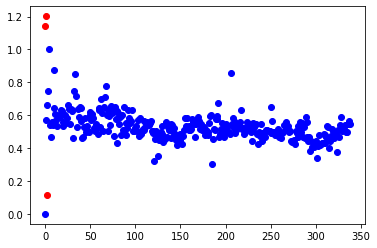

In [120]:
plot_g('SiO2')

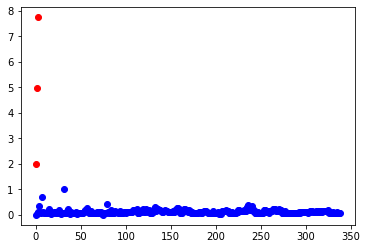

In [121]:
plot_g('TiO2')

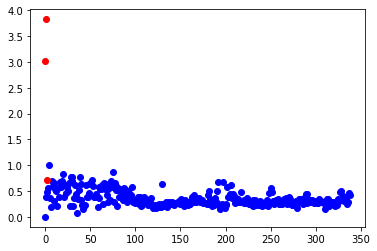

In [122]:
plot_g('Al2O3')

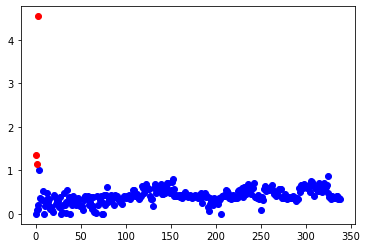

In [124]:
plot_g('FeOT')

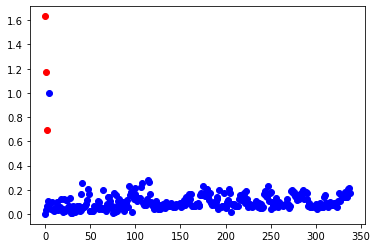

In [125]:
plot_g('MgO')

# Second Part for Libs
# In here we check for any rare earth metal,phosphorus,potassium in the lisp data or not , we just used these elements as they were not in LISP data from curiosity mars rover

**K [Potassium],rare earth Element and Phosporus we create a dummy dataset for them suppose they are present** 

In [127]:
anom_dict={'SiO2':[97,102,10],'TiO2':[20,50,78],'Al2O3':[97,123,23],'FeOT':[67,56,223],'MgO':[75,54,32],'CaO':[87.435,234,34],'Na2O':[97,234,32],'K2O':[55,45,23],'K':[24,34,56],'Rare_earth':[36,76,32],'P':[98,23,45]}

In [128]:
# We update these three elements in original dataset too with value as 0

In [129]:
new_dataframe['K']=None
new_dataframe['K']=0
new_dataframe['Rare_earth']=None
new_dataframe['Rare_earth']=0
new_dataframe['P']=None
new_dataframe['P']=0

# Now 1 means that these elements are not present K,Rare_earth,and P


In [131]:
new_dataframe.head()

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Label,K,Rare_earth,P
0,0.000000,0.000000,0.000000,0.000367,0.000000,0.000000,0.000000,0.000000,1,0,0,0
1,0.568631,0.040755,0.376407,0.080309,0.036371,0.011497,0.068299,0.051867,1,0,0,0
2,0.659158,0.070577,0.484130,0.124174,0.063159,0.052440,0.256443,0.210750,1,0,0,0
3,0.747310,0.107356,0.552624,0.194875,0.107773,0.249916,0.438144,0.405405,1,0,0,0
4,1.000000,0.355368,1.000000,1.000000,1.000000,1.000000,0.873439,1.000000,1,0,0,0


In [214]:
new_dataframe.shape[0]

339

In [215]:
K=np.random.uniform(size=new_dataframe.shape[0])
Rare_earth=np.random.uniform(size=new_dataframe.shape[0])
P=np.random.uniform(size=new_dataframe.shape[0])

In [216]:
data_frame_with_conc=new_dataframe.copy()

In [217]:
data_frame_with_conc=data_frame_with_conc.multiply(3)

# # Now here we create dummy label data 0 if K,Phosphorus,Potassium are present , we also introduce random values for these elements to give a little concentration for them

In [191]:
data_frame_with_conc['K']=K
data_frame_with_conc['Rare_earth']=Rare_earth
data_frame_with_conc['P']=P
data_frame_with_conc['Label']=0

In [192]:
data_frame_with_conc.head(5)

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Label,K,Rare_earth,P
0,0.000000,0.000000,0.000000,0.001101,0.000000,0.000000,0.000000,0.000000,0,0.129355,0.046091,0.757501
1,1.705892,0.122266,1.129221,0.240926,0.109113,0.034492,0.204897,0.155602,0,0.849644,0.837730,0.424123
2,1.977474,0.211730,1.452389,0.372523,0.189477,0.157319,0.769330,0.632250,0,0.189866,0.026548,0.415104
3,2.241929,0.322068,1.657871,0.584626,0.323319,0.749748,1.314433,1.216216,0,0.236372,0.461948,0.543142
4,3.000000,1.066103,3.000000,3.000000,3.000000,3.000000,2.620318,3.000000,0,0.713221,0.958198,0.762523


# Now this is our data with KREP
# append to the previous data frame to get complete data frame

In [194]:
new_frame=pd.concat([new_dataframe,data_frame_with_conc],axis=0)

In [195]:
new_frame.tail()

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Label,K,Rare_earth,P
334,1.489209,0.274354,0.997525,1.223052,0.410970,0.646943,0.954897,0.125000,0,0.902530,0.160796,0.120153
335,1.485670,0.295229,0.726661,1.210822,0.430571,0.714246,0.634021,0.054054,0,0.913321,0.001484,0.958271
336,1.637811,0.220676,0.857423,1.009018,0.606981,0.537577,0.865979,0.077703,0,0.001328,0.709766,0.195681
337,1.701498,0.247515,1.389810,1.094632,0.646183,0.520752,1.391753,0.118243,0,0.899547,0.927604,0.742691
338,1.641349,0.253479,1.259048,1.039594,0.515509,0.630118,1.074742,0.131757,0,0.634176,0.445143,0.070023


In [197]:
x_train=new_frame[['SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O','K','Rare_earth','P']].values

In [198]:
y_label=new_frame['Label']

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_label, test_size=0.33, random_state=42,shuffle=True)

In [218]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


# Strating training of our model with combined 'Shuffled data' now so that it learns to distinguish if these elements are present or not based on concentrations from lisp using a multi level perceptron

In [202]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=900, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001,activation='logistic')

In [203]:
clf.fit(X_train,y_train)

Iteration 1, loss = 0.69401789
Iteration 2, loss = 0.69905328
Iteration 3, loss = 0.69499554
Iteration 4, loss = 0.69476503
Iteration 5, loss = 0.69321499
Iteration 6, loss = 0.69160558
Iteration 7, loss = 0.69072648
Iteration 8, loss = 0.68992805
Iteration 9, loss = 0.68918454
Iteration 10, loss = 0.68838050
Iteration 11, loss = 0.68912623
Iteration 12, loss = 0.68574153
Iteration 13, loss = 0.68529060
Iteration 14, loss = 0.68512055
Iteration 15, loss = 0.68355716
Iteration 16, loss = 0.67992546
Iteration 17, loss = 0.67561450
Iteration 18, loss = 0.67029862
Iteration 19, loss = 0.66440011
Iteration 20, loss = 0.65697390
Iteration 21, loss = 0.64688921
Iteration 22, loss = 0.63409581
Iteration 23, loss = 0.61794676
Iteration 24, loss = 0.59681120
Iteration 25, loss = 0.57030230
Iteration 26, loss = 0.53778177
Iteration 27, loss = 0.50008040
Iteration 28, loss = 0.45588315
Iteration 29, loss = 0.40648153
Iteration 30, loss = 0.35552378
Iteration 31, loss = 0.30244549
Iteration 32, los

Iteration 282, loss = 0.01468858
Iteration 283, loss = 0.01467487
Iteration 284, loss = 0.01466522
Iteration 285, loss = 0.01467561
Iteration 286, loss = 0.01465300
Iteration 287, loss = 0.01464293
Iteration 288, loss = 0.01461822
Iteration 289, loss = 0.01459505
Iteration 290, loss = 0.01458518
Iteration 291, loss = 0.01457521
Iteration 292, loss = 0.01457218
Iteration 293, loss = 0.01456211
Iteration 294, loss = 0.01455218
Iteration 295, loss = 0.01454625
Iteration 296, loss = 0.01453799
Iteration 297, loss = 0.01453272
Iteration 298, loss = 0.01453129
Iteration 299, loss = 0.01449940
Iteration 300, loss = 0.01447639
Iteration 301, loss = 0.01446143
Iteration 302, loss = 0.01445957
Iteration 303, loss = 0.01443630
Iteration 304, loss = 0.01443115
Iteration 305, loss = 0.01441705
Iteration 306, loss = 0.01440401
Iteration 307, loss = 0.01439330
Iteration 308, loss = 0.01439547
Iteration 309, loss = 0.01438913
Iteration 310, loss = 0.01435999
Iteration 311, loss = 0.01433982
Iteration 

Iteration 544, loss = 0.00054071
Iteration 545, loss = 0.00053825
Iteration 546, loss = 0.00053570
Iteration 547, loss = 0.00053355
Iteration 548, loss = 0.00053150
Iteration 549, loss = 0.00052936
Iteration 550, loss = 0.00052726
Iteration 551, loss = 0.00052555
Iteration 552, loss = 0.00052312
Iteration 553, loss = 0.00052109
Iteration 554, loss = 0.00051923
Iteration 555, loss = 0.00051732
Iteration 556, loss = 0.00051535
Iteration 557, loss = 0.00051353
Iteration 558, loss = 0.00051187
Iteration 559, loss = 0.00051000
Iteration 560, loss = 0.00050781
Iteration 561, loss = 0.00050606
Iteration 562, loss = 0.00050445
Iteration 563, loss = 0.00050250
Iteration 564, loss = 0.00050051
Iteration 565, loss = 0.00049877
Iteration 566, loss = 0.00049704
Iteration 567, loss = 0.00049527
Iteration 568, loss = 0.00049366
Iteration 569, loss = 0.00049183
Iteration 570, loss = 0.00049017
Iteration 571, loss = 0.00048835
Iteration 572, loss = 0.00048679
Iteration 573, loss = 0.00048519
Iteration 

Iteration 808, loss = 0.00030136
Iteration 809, loss = 0.00030098
Iteration 810, loss = 0.00030064
Iteration 811, loss = 0.00030026
Iteration 812, loss = 0.00029990
Iteration 813, loss = 0.00029954
Iteration 814, loss = 0.00029920
Iteration 815, loss = 0.00029888
Iteration 816, loss = 0.00029861
Iteration 817, loss = 0.00029828
Iteration 818, loss = 0.00029797
Iteration 819, loss = 0.00029768
Iteration 820, loss = 0.00029710
Iteration 821, loss = 0.00029681
Iteration 822, loss = 0.00029647
Iteration 823, loss = 0.00029612
Iteration 824, loss = 0.00029574
Iteration 825, loss = 0.00029538
Iteration 826, loss = 0.00029504
Iteration 827, loss = 0.00029472
Iteration 828, loss = 0.00029430
Iteration 829, loss = 0.00029401
Iteration 830, loss = 0.00029376
Iteration 831, loss = 0.00029344
Iteration 832, loss = 0.00029311
Iteration 833, loss = 0.00029278
Iteration 834, loss = 0.00029248
Iteration 835, loss = 0.00029216
Iteration 836, loss = 0.00029183
Iteration 837, loss = 0.00029146
Iteration 

D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=900, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=21, shuffle=True, solver='adam', tol=1e-09,
              validation_fraction=0.1, verbose=10, warm_start=False)

# Making predictions and checking out accuracy.

In [204]:
#Lets check classes
predictions=clf.predict(X_test)

In [205]:
predictions

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1], dtype=int64)

In [206]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [207]:
#Check the accuracy of model
accuracy_score(y_test,predictions)

1.0

# Thus it has learnt how to identify between something which it has not seen and one it trained on.
# We now try to make cluster and see if it identifies two clusters one for label 0 - with concentration of KREP and other 1 with no KREP

In [208]:
#Now we will try making k means clusters to classify
from sklearn.cluster import KMeans


# We Use elbow curve to check the number of clusters that are feasable as we see it is suggesting us to use 2 clusters

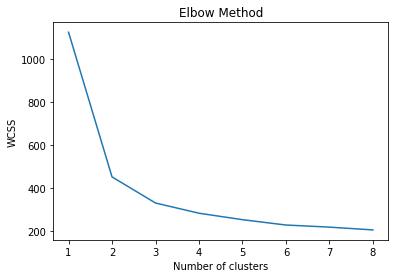

In [209]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Thus we use only 2 clusters

# Thus we use only 2 clusters based on elbow curve

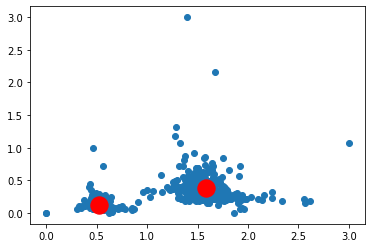

In [211]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_train)
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Thus two clusters :)